In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Patch
from plot_utils import set_size

In [2]:
# DATA PARAMS
phis = np.array([12, 50, 87, 125, 162, 200, 237, 275, 312, 350, 387, 425, 462, 500, 537, 575, 612, 650, 687, 725])
figsize = set_size(252,subplots=(2,2))

In [3]:
# PLOT PARAMS
plt.rcParams['font.size'] = 8                 
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = [3.6,2.6]
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

fmt = 'eps'

In [4]:
# bifurcation data
phis_bif = np.genfromtxt('../bifurcation_diagram/phis_bif.dat')[:-2]
# beta02
bif_data_exp02 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-2_exp_revised.dat').reshape(20,200,100)
bif_data_sim02 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-2_sim_revised.dat').reshape(20,200,100)

# beta08
bif_data_exp08 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-8_exp_revised.dat').reshape(20,200,100)
bif_data_sim08 = np.genfromtxt('../data/bifurcation_diagram/bifurcation_data_beta0-8_sim_revised.dat').reshape(20,200,100)

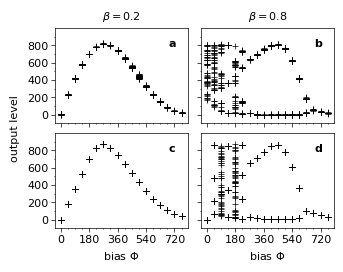

In [5]:
if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None

fig = plt.figure(constrained_layout=False)

gs = GridSpec(2,2,figure=fig,wspace=0.1,hspace=0.1)

ax_exp02 = fig.add_subplot(gs[0,0])
ax_sim02 = fig.add_subplot(gs[1,0])


ax_exp08 = fig.add_subplot(gs[0,1])
ax_sim08 = fig.add_subplot(gs[1,1])

axes_exp = [ax_exp02,ax_exp08]
axes_sim = [ax_sim02,ax_sim08]
axes = axes_exp + axes_sim
ax_label = fig.add_subplot(gs[:,:])

for ax in [ax_label]:
    plt.setp(ax.spines.values(), visible=False)
    # remove ticks and labels for the left axis
    ax.tick_params(left=False)
    #remove background patch (only needed for non-white background)
    ax.patch.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

ax_label.set_ylabel('output level',labelpad=25)

ax_sim08.set_xlabel(r'bias $\Phi$')
ax_sim02.set_xlabel(r'bias $\Phi$')

ax_exp02.set_title(r'$\beta = 0.2$')

ax_exp08.set_title(r'$\beta = 0.8$')

biftickstep = 4
last_steps = 50

s = 15
marker='+'
alpha=1
lw=0.5

# Bifurcation diagrams
for i,phi in enumerate(phis_bif):
    ax_exp02.scatter([phi]*last_steps,bif_data_exp02[i,-last_steps:,0],rasterized=raster,c='black',s=s,marker=marker,linewidths=lw)
    ax_sim02.scatter([phi]*last_steps,bif_data_sim02[i,-last_steps:,0],rasterized=raster,c='black',s=s,marker=marker,linewidths=lw)
    
    ax_exp08.scatter([phi]*last_steps,bif_data_exp08[i,-last_steps:,0],rasterized=raster,c='black',s=s,marker=marker,linewidths=lw)
    ax_sim08.scatter([phi]*last_steps,bif_data_sim08[i,-last_steps:,0],rasterized=raster,c='black',s=s,marker=marker,linewidths=lw)

for ax,letter in zip(axes,'abcdef'):
    ax.set_xticks(phis_bif[::biftickstep])
    ax.set_xticks(phis_bif,minor=True)
    ax.set_xticklabels([])
    ax.set_yticks(np.arange(0,1000,100),minor=True)
    ax.set_yticks(np.arange(0,1000,200))
    ax.text(0.85,0.8,r'$\mathbf{{{}}}$'.format(letter),transform=ax.transAxes)
    ax.set_ylim([-100,1000])
for ax in axes_sim:
    ax.set_xticklabels(phis_bif[::biftickstep].astype(int))

for ax in axes:
    ax.set_yticklabels([])
ax_exp02.set_yticklabels(np.arange(0,1000,200))
ax_sim02.set_yticklabels(np.arange(0,1000,200))

plt.savefig(fmt+'/fig07_bifurcation_diagram_beta0-2_0-8.'+fmt,bbox_inches='tight',dpi=dpi)
plt.show()